In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
print("Success")

Success


In [2]:
df = pd.read_csv('fods_1.csv')
df

,MLOGP,RDCHI,quantitative response of LC50
0,2.419,1.225,3.740
1,2.638,1.401,4.330
2,5.799,2.930,7.019
3,5.453,2.887,6.723
4,4.068,2.758,5.979
...,...,...,...
541,3.326,2.837,4.651
542,3.275,2.727,3.953
543,5.165,3.111,6.219
544,2.859,2.614,4.995


In [3]:
meanX1 = df['MLOGP'].mean()
meanX2 = df['RDCHI'].mean()
meanY = df['quantitative response of LC50'].mean()
stdX1 = df['MLOGP'].std()
stdX2 = df['RDCHI'].std()
stdY = df['quantitative response of LC50'].std()
print(meanX1, meanX2, meanY, stdX1, stdX2, stdY)

2.3134926739926738 2.4922985347985356 4.6584212454212475 1.741797285664983 0.8110039291512505 1.6652150617992907


In [4]:
df['MLOGP'] = (df['MLOGP'] - meanX1)/stdX1
df['RDCHI'] = (df['RDCHI'] - meanX2)/stdX2
df['quantitative response of LC50'] = (df['quantitative response of LC50'] - meanY)/stdY
df

,MLOGP,RDCHI,quantitative response of LC50
0,0.060574,-1.562629,-0.551533
1,0.186306,-1.345614,-0.197225
2,2.001098,0.539703,1.417582
3,1.802453,0.486683,1.239827
4,1.007297,0.327620,0.793038
...,...,...,...
541,0.581300,0.425031,-0.004457
542,0.552020,0.289396,-0.423622
543,1.637106,0.762883,0.937163
544,0.313186,0.150063,0.202123


In [5]:
df.isnull().sum()

MLOGP                            0
RDCHI                            0
quantitative response of LC50    0
dtype: int64

In [6]:
train, test = train_test_split(df, test_size=0.2) # this is a random split
train

,MLOGP,RDCHI,quantitative response of LC50
124,-0.448096,-0.537973,-0.707069
219,-0.050231,-1.513308,-0.609784
473,-1.517107,-0.769785,-1.606652
214,0.561206,-1.163124,0.161288
96,-0.211559,-0.038592,-0.785137
...,...,...,...
449,0.667992,-0.783348,0.096431
354,0.023256,-0.045991,-0.525711
166,-1.199619,-0.473855,-1.663702
161,0.949311,1.079775,0.490374


In [7]:
test

,MLOGP,RDCHI,quantitative response of LC50
483,-0.724248,0.226511,0.877111
481,0.490589,1.926873,1.039252
430,0.332132,1.226506,-0.624196
85,-0.196632,-0.244510,-0.030279
381,0.185732,-0.182858,-0.029078
...,...,...,...
432,0.308594,-0.390009,-0.781533
88,-1.129002,-1.428228,-2.236000
325,-0.515842,-0.515779,0.205726
475,-0.663965,-1.428228,0.456145


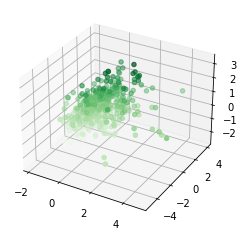

In [8]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = train["quantitative response of LC50"]
xdata = train["RDCHI"]
ydata = train["MLOGP"]
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [9]:
trainX = pd.DataFrame(train[["RDCHI", "MLOGP"]])
trainX

,RDCHI,MLOGP
124,-0.537973,-0.448096
219,-1.513308,-0.050231
473,-0.769785,-1.517107
214,-1.163124,0.561206
96,-0.038592,-0.211559
...,...,...
449,-0.783348,0.667992
354,-0.045991,0.023256
166,-0.473855,-1.199619
161,1.079775,0.949311


In [10]:
trainY = pd.DataFrame(train["quantitative response of LC50"])
trainY

,quantitative response of LC50
124,-0.707069
219,-0.609784
473,-1.606652
214,0.161288
96,-0.785137
...,...
449,0.096431
354,-0.525711
166,-1.663702
161,0.490374


In [11]:
testX = pd.DataFrame(test[["RDCHI", "MLOGP"]])
testY = pd.DataFrame(test['quantitative response of LC50'])
testX

,RDCHI,MLOGP
483,0.226511,-0.724248
481,1.926873,0.490589
430,1.226506,0.332132
85,-0.244510,-0.196632
381,-0.182858,0.185732
...,...,...
432,-0.390009,0.308594
88,-1.428228,-1.129002
325,-0.515779,-0.515842
475,-1.428228,-0.663965


In [12]:
testY

,quantitative response of LC50
483,0.877111
481,1.039252
430,-0.624196
85,-0.030279
381,-0.029078
...,...
432,-0.781533
88,-2.236000
325,0.205726
475,0.456145


In [13]:
valX = trainX[trainX.columns[:]].to_numpy()
valX = np.append(np.ones((436,1)), valX, axis=1)
valY = trainY[trainY.columns[:]].to_numpy()
np.shape(valX)

(436, 3)

In [14]:
np.shape(valY)

(436, 1)

In [15]:
valTestX = testX[testX.columns[:]].to_numpy()
valTestX = np.append(np.ones((110,1)), valTestX, axis=1)
valTestY = testY[testY.columns[:]].to_numpy()
np.shape(valTestX)

(110, 3)

In [16]:
np.shape(valTestY)

(110, 1)

In [17]:
iters = 1500
learningRate = 0.01 #yeta or n
costArr= np.zeros(iters+100)
counterArr = np.zeros(iters+100)
TrainErrorArray = np.array([])
TestErrorArray = np.array([])

In [18]:
# Degree 1 here
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w2 += (((valY[j,0]-(w*valX[j,:]))*valX[j,:]))

    #w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')


w0=-3.3793408231618107
w1=-1.8320717920332332
w2=-0.9883758084017544


In [19]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= (np.sum(w*valX[i,:wSize]) - valY[i,0])**2
    
TrainErrorArray = np.append(TrainErrorArray, w1)
w1

9105.235205319479

In [20]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += (np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2
    
TestErrorArray = np.append(TestErrorArray, testError)
testError

2039.1385489351796

In [21]:
# Reularization variables
Lambda = np.exp(-6)
q = 0.5

In [22]:
# Degree 1 here
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w4 = np.abs(w)
        w5 = w4**(q-1)
        w3 = Lambda*q*w5
        w2 += ((valY[j,0]-(w*valX[j,:]))*valX[j,:]) + w3/2

    #w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')


w0=-3.37663898328924
w1=-1.8293699521606652
w2=-0.9856739685291882


In [23]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1

9087.851845617832

In [24]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError

2035.6467353127364

In [25]:
# Reularization variables
Lambda = np.exp(-6)
q = 1

In [26]:
# Degree 1 here
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w4 = np.abs(w)
        w5 = w4**(q-1)
        w3 = Lambda*q*w5
        w2 += ((valY[j,0]-(w*valX[j,:]))*valX[j,:]) + w3/2

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')


w0=0.9899680340747324
w1=0.9935168162562199
w2=0.9954518987874849


In [27]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1

1235.2245981252443

In [28]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError

273.343410633015

In [29]:
# Reularization variables
Lambda = np.exp(-6)
q = 2

In [30]:
# Degree 1 here
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w4 = np.abs(w)
        w5 = w4**(q-1)
        w3 = Lambda*q*w5
        w2 += ((valY[j,0]-(w*valX[j,:]))*valX[j,:]) + w3/2

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')


w0=0.9899804278356157
w1=0.9935292100171033
w2=0.9954642925483681


In [31]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1

1235.2439126993445

In [32]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError

273.3465460206001

In [33]:
# Reularization variables
Lambda = np.exp(-7)
q = 4

In [34]:
# Degree 1 here
degree = 1
wSize = 3
w = np.ones(wSize)
w1 = np.zeros(wSize)

counter = 0
costArr= np.zeros(iters+1)
counterArr = np.zeros(iters+1)
for i in range(iters):
    w2 = np.zeros(wSize)
    for j in range(np.shape(valX)[0]):
        w4 = np.abs(w)
        w5 = w4**(q-1)
        w3 = Lambda*q*w5
        w2 += ((valY[j,0]-(w*valX[j,:]))*valX[j,:]) + w3/2

    w2 = w2/np.shape(valX)[0] #N
    
    w1 = w + learningRate*w2
    if w1[0] - w[0] <= 10**(-20):
        w=w1
        break
    w=w1
    counter+=1
    costArr[counter] = w2[0]
    counterArr[counter] = counter

   

for i in range(np.shape(w)[0]):    
    print("w", i, "=", w[i], sep = '')


w0=0.9899738779531602
w1=0.9935226601346477
w2=0.9954577426659126


In [35]:
w1 = 0
for i in range(np.shape(valX)[0]):
    w1+= ((np.sum(w*valX[i,:wSize]) - valY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TrainErrorArray = np.append(TrainErrorArray, w1)
w1

1234.2091190725914

In [36]:
testError = 0
for i in range(np.shape(valTestX)[0]):
    testError += ((np.sum(w*valTestX[i,:wSize]) - valTestY[i,0])**2) + Lambda*np.sum(np.abs(w)**q)/2

TestErrorArray = np.append(TestErrorArray, testError)
testError

273.0863925042078

In [37]:
print(TrainErrorArray)
print(TestErrorArray)

[9105.23520532 9087.85184562 1235.22459813 1235.2439127  1234.20911907]
[2039.13854894 2035.64673531  273.34341063  273.34654602  273.0863925 ]
